In [1]:
import sklearn
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [2]:
# 캘리포니아 주택가격
calhouse = sklearn.datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns = calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns=['y'])
df = pd.concat([dfx, dfy],axis=1)

In [3]:
df_sp1 = df[['MedInc','y']]

In [4]:
df_sp1

,MedInc,y
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [5]:
#stats 모델을 이용해서 데이터의 관계 등을 확인해 보자!

model1=sm.OLS.from_formula('y~MedInc',data=df_sp1)
model1_res=model1.fit()

In [6]:
model1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:00:04   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4509      0.013     34.082      0.000       0.425       0.477
MedInc         0.4179      0.003    136.223      0.000       0.412       0.424
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model_all =sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df)
model_all_res = model_all.fit()

In [10]:
model_all_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:04:01   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 다중회귀 여러 컬럼들이 추가되어 회귀분석을 진행하는데 
- 잔차 정규성 등도 봐야하고 여러가지 봐야하지만, 다중공선성 봐야한다 VIF -> R^2 
- 다중공선성이 변수들간의 선형관계 보고 만약 둘의 관계가 선형성이 잇으면 -> 분산이 같이 움직이게 되어 결국 팽창하게 되면서 우리가 예측할 값들 오류발생할 확률이 높아진다.

- 선형대수 개념으로 보면 선형의존, 선형독립 개념으로 같이 생각해 보기!

# 실제 변수를 추가했을 때 바뀌는 값들을 이해하고
- 어떤 변수들을 추가해야 하며, 어떤 식으로 스케일링을 해야 할까 등을

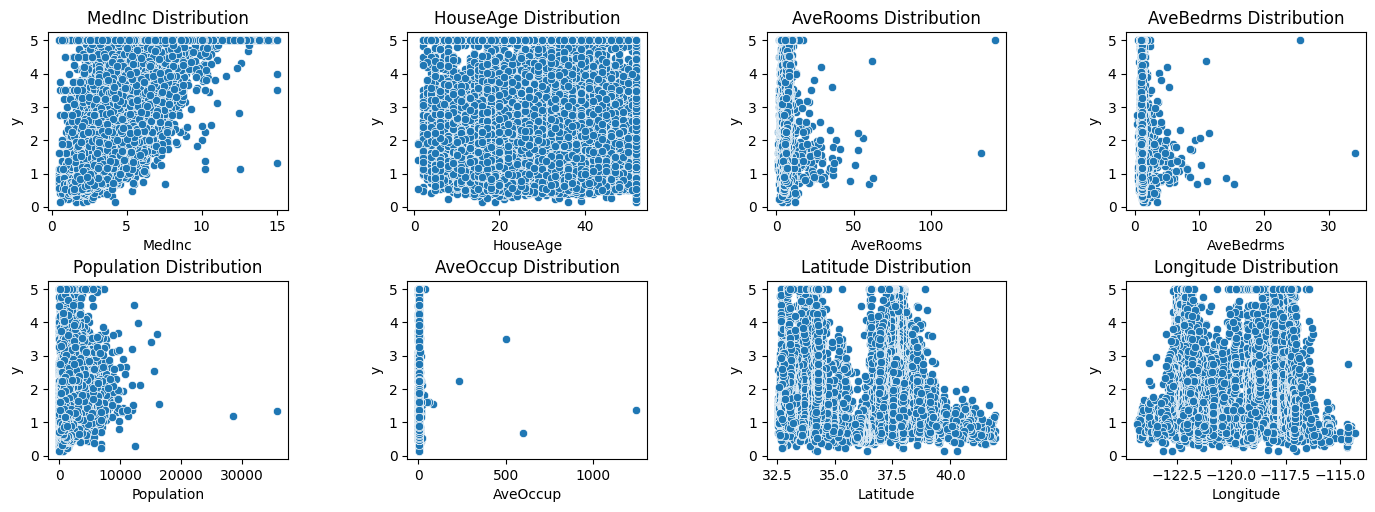

In [16]:
#변수들의 대한 시각화 필수로 봐야 한다!

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(17,12))
plt.subplots_adjust(wspace= 0.5, hspace=0.4)

cal_feature =[ 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']

for idx, feature in enumerate(cal_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature,
                   y='y',
                   data = df,
                   ax = ax)
    ax.set_title(f'{feature} Distribution')

In [14]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'y'],
      dtype='object')

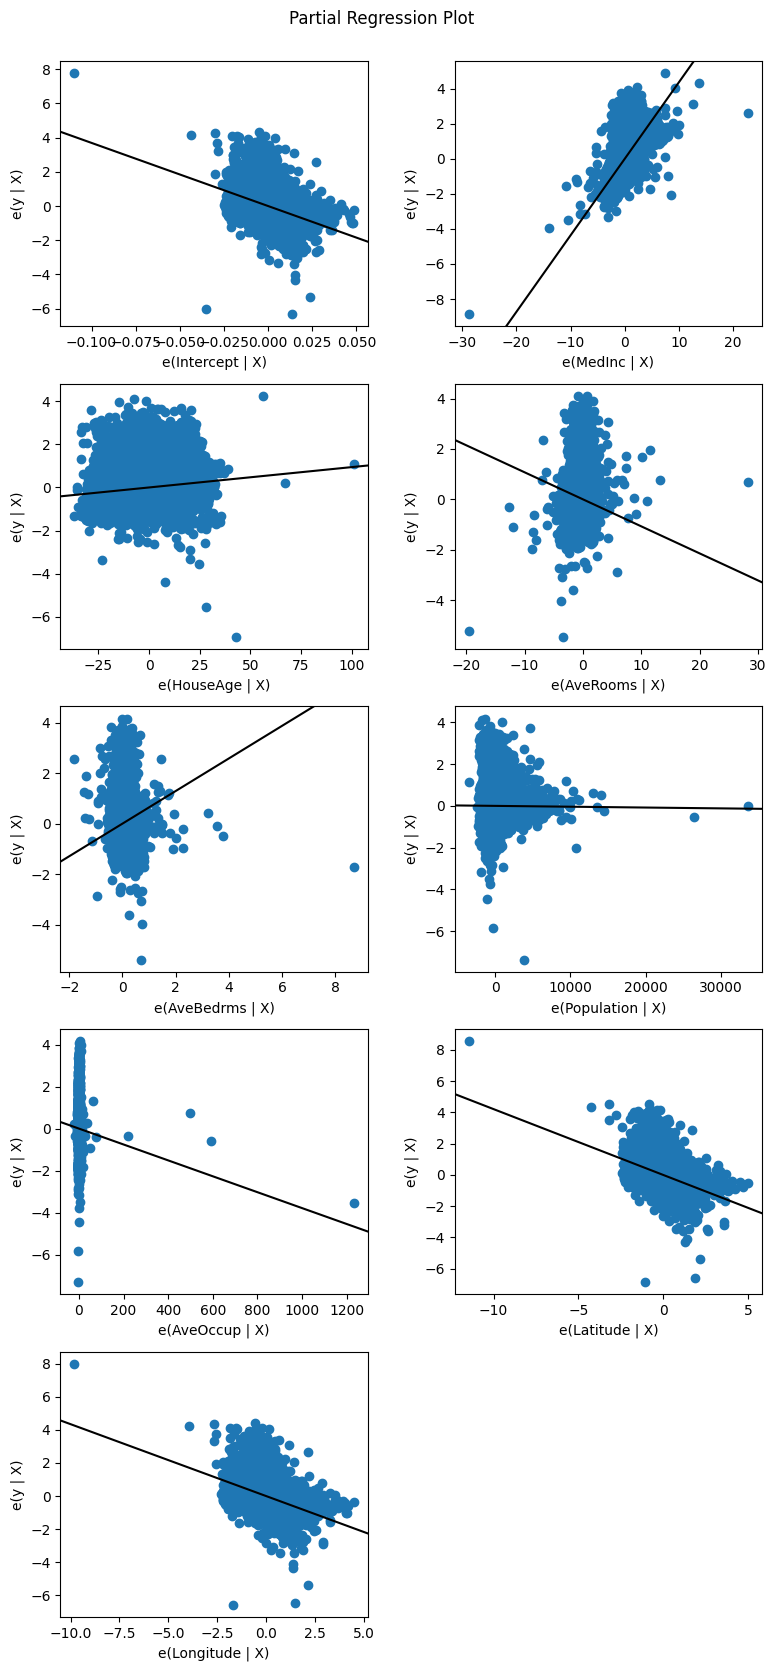

In [17]:
fig = plt.figure(figsize=(8,17))
sm.graphics.plot_partregress_grid(model_all_res, fig=fig)
plt.show()

In [19]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'y'],
      dtype='object')

In [20]:
df_p_out=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup','Latitude', 'Longitude','y']]

In [21]:
df_p_out

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,2.123209,39.43,-121.32,0.847


In [22]:
model_p_out =sm.OLS.from_formula('y~MedInc+HouseAge+AveRooms+AveBedrms+AveOccup+Latitude+Longitude', data=df_p_out)
model_p_out_res = model_p_out.fit()

In [23]:
model_p_out_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:19:14   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 필수과제 1
- 위의 변수들 중에서 선형적이다 판단 되는 것들만 다 넣지말고 추려서 넣어보기!
- 실제 summary()해서 결과물을 보여주세요!

In [24]:
##변수들 상관분석
df.corr(method='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
y,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

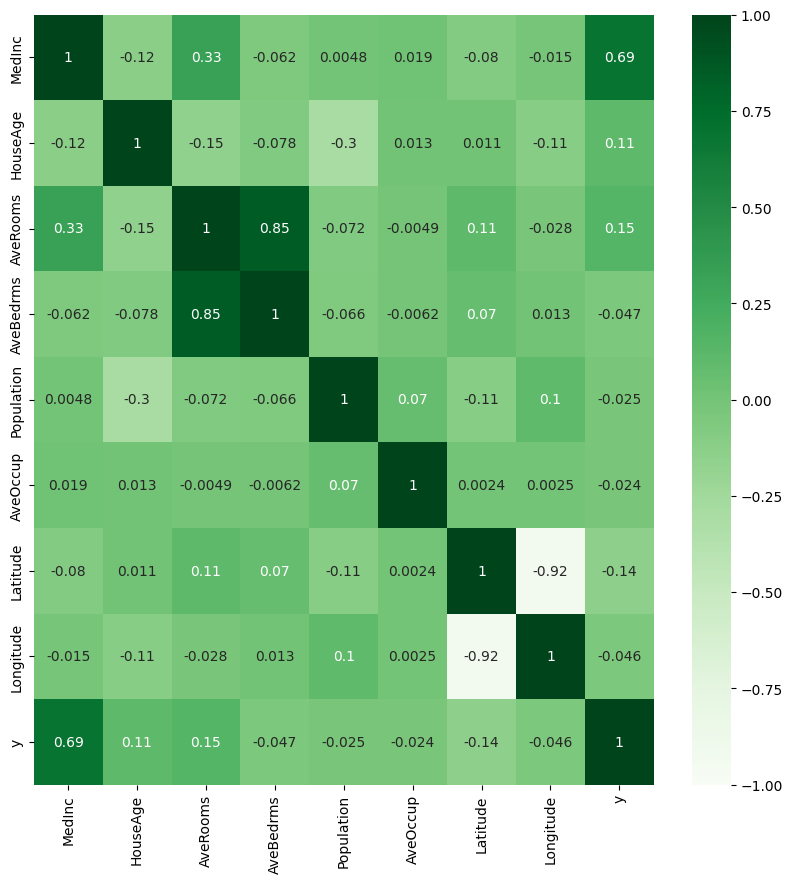

In [25]:
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df.corr(),
           annot=True,
           cmap='Greens',
           vmin = -1, vmax=1)

In [26]:
df_p_out

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,2.123209,39.43,-121.32,0.847


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [33]:
#전체 변수 스케일링 진행
df_p_out_sc = scaler.fit_transform(df_p_out)

# 데이터프레임 만들기
df_p_out_sc_pd = pd.DataFrame(df_p_out_sc, columns = df_p_out.columns)

In [34]:
df_p_out_sc

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.05275646, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.72582359, 0.30976096,
        0.15340349]])

In [35]:
df_p_out_sc_pd

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,y
0,0.539668,0.784314,0.043512,0.020469,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.001503,0.737513,0.324701,0.130105
20636,0.141853,0.333333,0.037344,0.029124,0.001956,0.738576,0.312749,0.128043
20637,0.082764,0.313725,0.030904,0.023323,0.001314,0.732200,0.311753,0.159383
20638,0.094295,0.333333,0.031783,0.024859,0.001152,0.732200,0.301793,0.143713


- 스케일링하고 바로 회귀분석

In [36]:
model_p_out_sc =sm.OLS.from_formula('y~MedInc+HouseAge+AveRooms+AveBedrms+AveOccup+Latitude+Longitude', data=df_p_out_sc_pd)
model_p_out_sc_res = model_p_out_sc.fit()

In [37]:
model_p_out_sc_res.summary() # 스케일링 한 경우 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:30:30   Log-Likelihood:                 9966.1
No. Observations:               20640   AIC:                        -1.992e+04
Df Residuals:                   20632   BIC:                        -1.985e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7352      0.013     54.862      0.000       0.709       0.761
MedInc         1.3058      0.013    104.089      0.000       1.281       1.330
HouseAge       0.1005      0.004     22.602      0.000       0.092       0.109
AveRooms      -3.1160      0.171    -18.217      0.000      -3.451      -2.781
AveBedrms      4.4855      0.196     22.922      0.000       4.102       4.869
AveOccup      -0.9786      0.124     -7.861      0.000      -1.223      -0.735
Latitude      -0.8162      0.014    -58.763      0.000      -0.843      -0.789
Longitude     -0.8985      0.016    -57.782      0.000      -0.929      -0.868
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model_p_out_res.summary() # p out

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:30:53   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 해당 분포를 통해서 조금씩 정규분포로 만들어가면서 기존 선형회귀의 가정들을 맞춰가면 조금은 달라질 수 있지 않을까?


- MedInc 로그스케일링 진행해보자!

<Axes: >

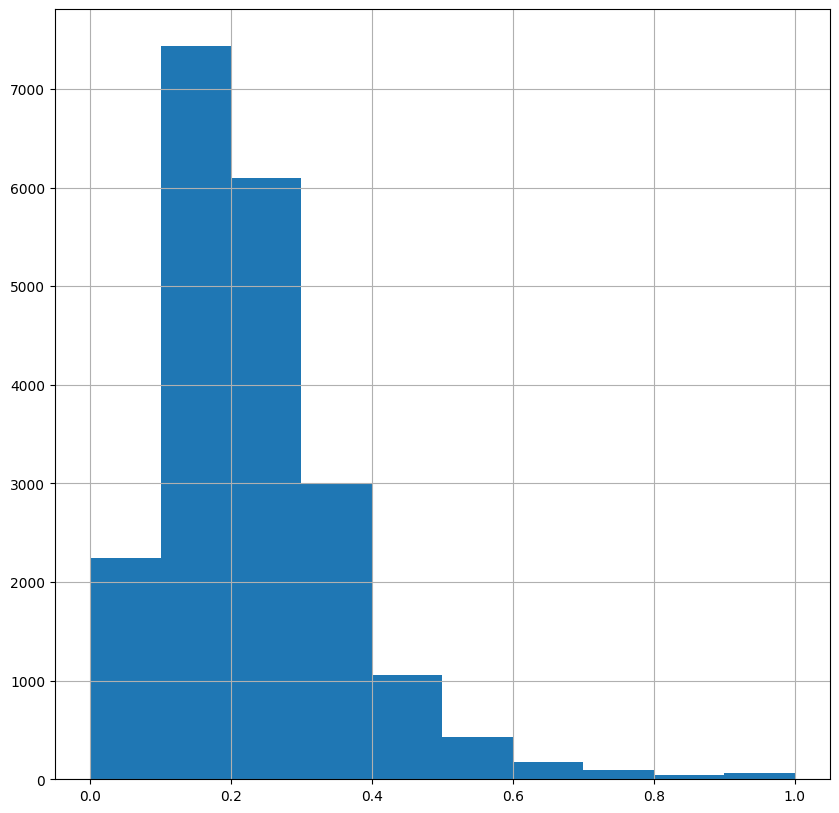

In [39]:
df_p_out_sc_pd['MedInc'].hist()

In [49]:
import numpy as np
#로그 스케일링한 값으로 
df_p_out_sc_pd['MedInc'] =np.log1p(df_p_out_sc_pd['MedInc'])

In [50]:
#로그 스케일링 
#df_p_out_sc_pd['AveRooms']
df_p_out_sc_pd['AveRooms'] =np.log1p(df_p_out_sc_pd['AveRooms'])

<Axes: >

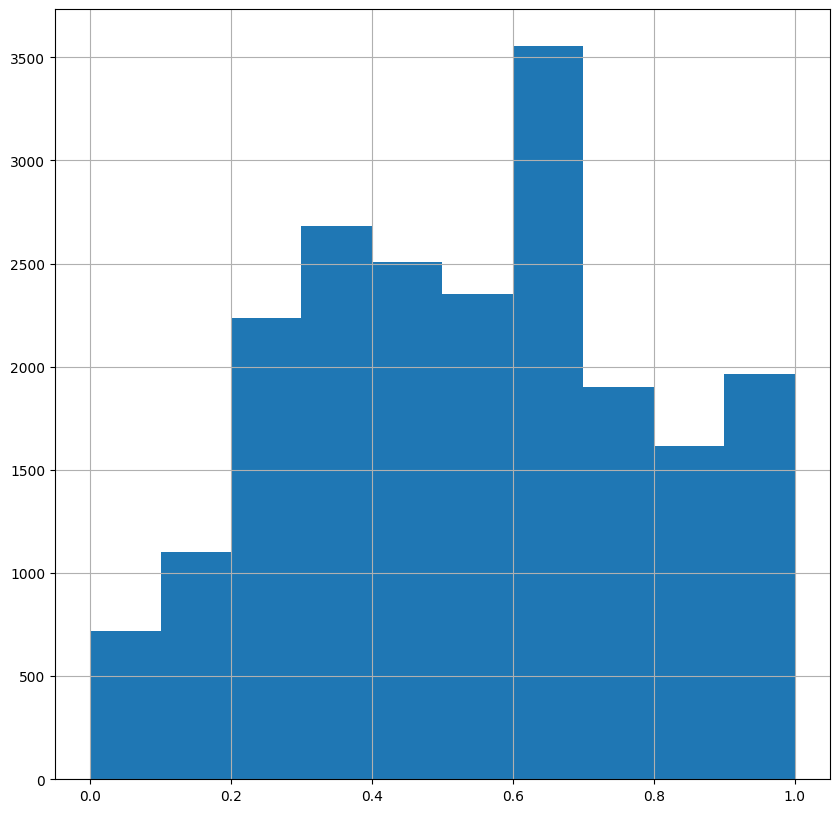

In [40]:
df_p_out_sc_pd['HouseAge'].hist()

In [42]:
df_p_out_sc_pd.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude', 'y'],
      dtype='object')

<Axes: >

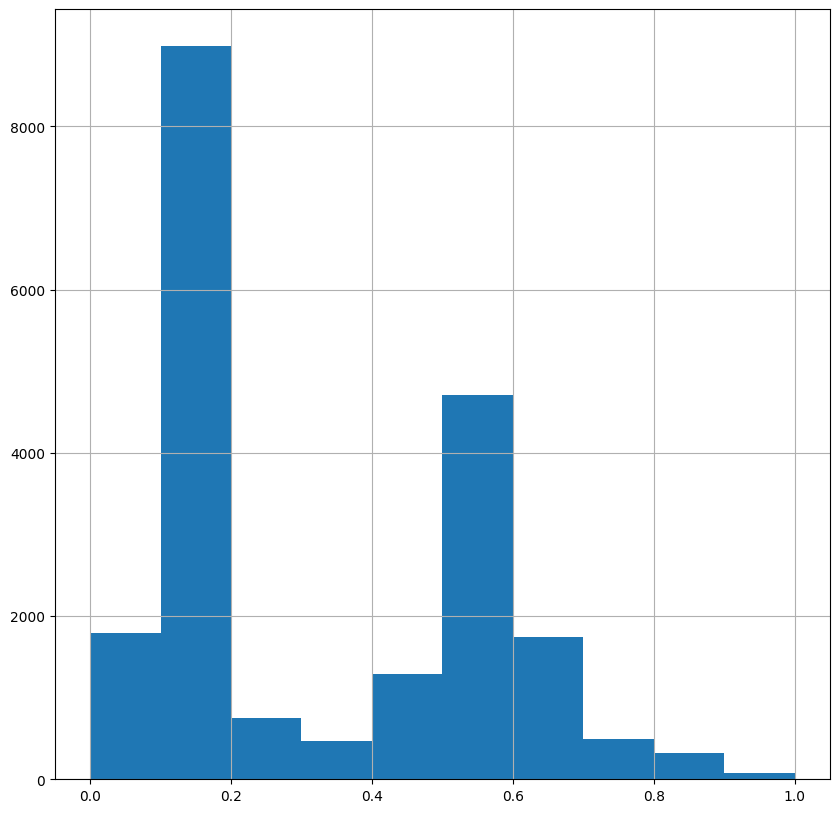

In [44]:
df_p_out_sc_pd['Latitude'].hist()

<Axes: >

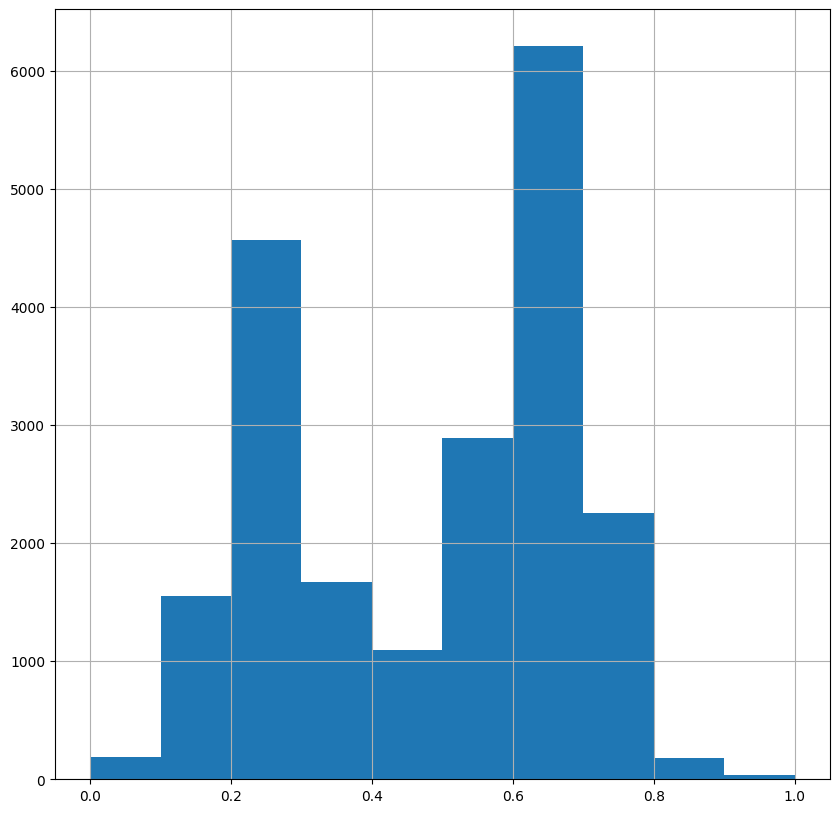

In [45]:
df_p_out_sc_pd['Longitude'].hist()

In [51]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [53]:
hg=np.array(df_p_out_sc_pd['HouseAge']).reshape(-1,1)

In [55]:
df_p_out_sc_pd['HouseAge'] =standard_scaler.fit_transform(hg)

<Axes: >

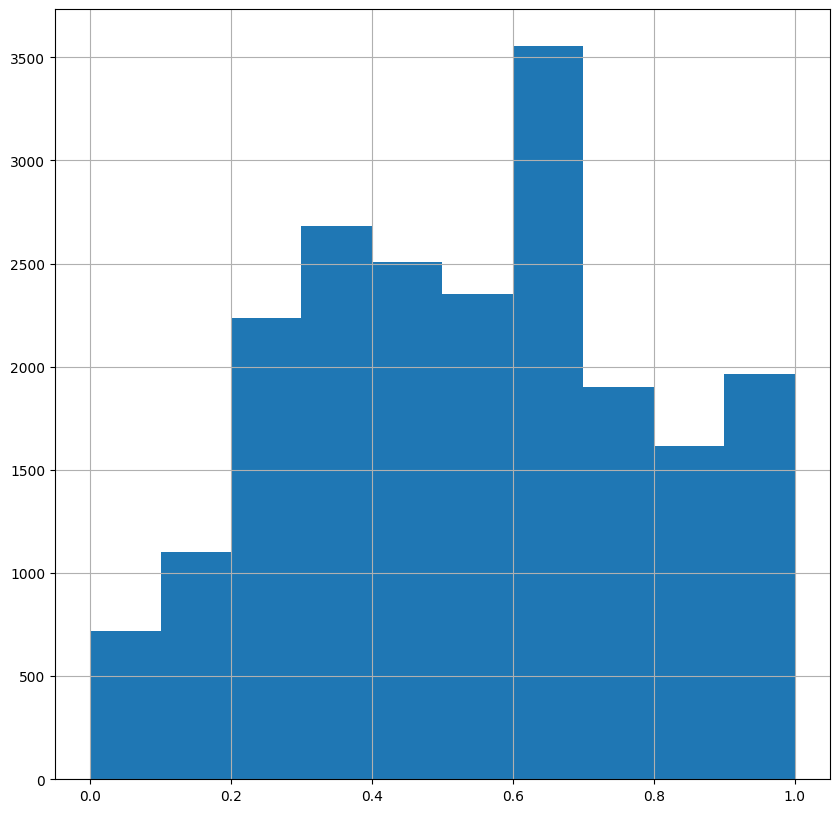

In [52]:
df_p_out_sc_pd['HouseAge'].hist()

<Axes: >

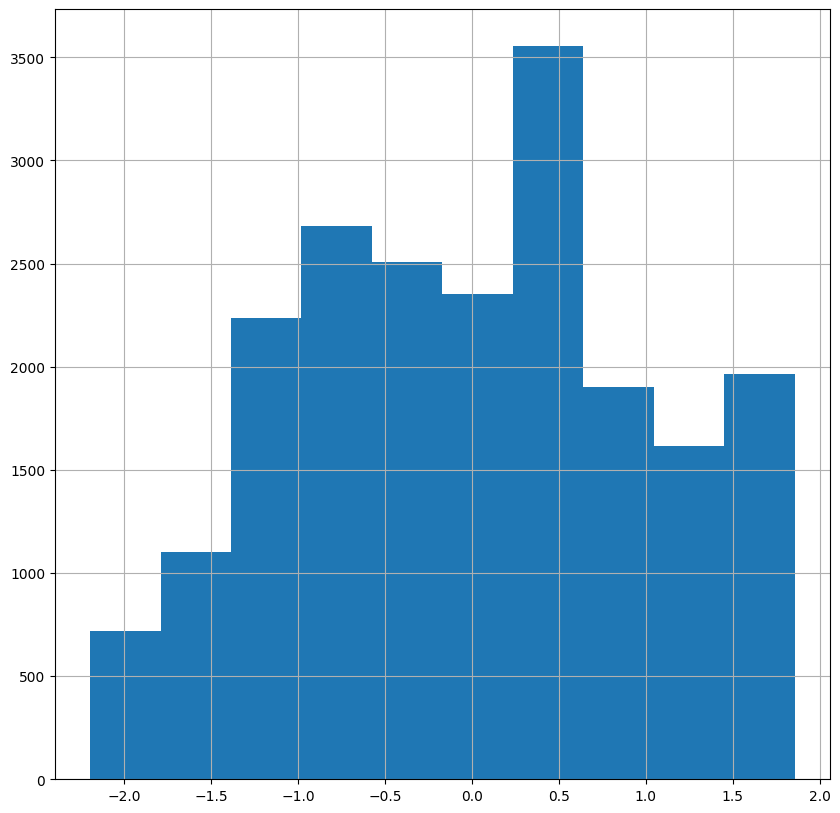

In [56]:
df_p_out_sc_pd['HouseAge'].hist()

In [57]:
df_p_out_sc_pd

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,y
0,0.431567,0.982143,0.042592,0.020469,0.001499,0.567481,0.211155,0.902266
1,0.430500,-0.607019,0.037512,0.018929,0.001141,0.565356,0.212151,0.708247
2,0.382557,1.856182,0.051412,0.021940,0.001698,0.564293,0.210159,0.695051
3,0.303579,1.856182,0.034634,0.021929,0.001493,0.564293,0.209163,0.672783
4,0.207645,1.856182,0.037810,0.022166,0.001198,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...
20635,0.070580,-0.289187,0.029334,0.023715,0.001503,0.737513,0.324701,0.130105
20636,0.132653,-0.845393,0.036664,0.029124,0.001956,0.738576,0.312749,0.128043
20637,0.079517,-0.924851,0.030436,0.023323,0.001314,0.732200,0.311753,0.159383
20638,0.090111,-0.845393,0.031288,0.024859,0.001152,0.732200,0.301793,0.143713


In [58]:
model_p_out_sc_fin =sm.OLS.from_formula('y~MedInc+HouseAge+AveRooms+AveBedrms+AveOccup+Latitude+Longitude', data=df_p_out_sc_pd)
model_p_out_sc_fin_res = model_p_out_sc_fin.fit()

In [59]:
model_p_out_sc_fin_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     4567.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:44:43   Log-Likelihood:                 10007.
No. Observations:               20640   AIC:                        -2.000e+04
Df Residuals:                   20632   BIC:                        -1.993e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7190      0.013     56.157      0.000       0.694       0.744
MedInc         1.7441      0.017    103.611      0.000       1.711       1.777
HouseAge       0.0266      0.001     24.271      0.000       0.024       0.029
AveRooms      -3.5157      0.182    -19.269      0.000      -3.873      -3.158
AveBedrms      4.2144      0.173     24.337      0.000       3.875       4.554
AveOccup      -0.9641      0.124     -7.761      0.000      -1.208      -0.721
Latitude      -0.7740      0.014    -54.506      0.000      -0.802      -0.746
Longitude     -0.8531      0.016    -53.887      0.000      -0.884      -0.822
==============================================================================
Omnibus:                     4543.091   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17342.549
Skew:                           1.061   Prob(JB):                         0.00
Kurtosis:                       6.957   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model_p_out_res.summary() # p out

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:45:04   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.526e+04
Df Residuals:                   20632   BIC:                         4.533e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9175      0.658    -56.085      0.000     -38.208     -35.627
MedInc         0.4368      0.004    104.089      0.000       0.429       0.445
HouseAge       0.0096      0.000     22.602      0.000       0.009       0.010
AveRooms      -0.1071      0.006    -18.217      0.000      -0.119      -0.096
AveBedrms      0.6449      0.028     22.922      0.000       0.590       0.700
AveOccup      -0.0038      0.000     -7.861      0.000      -0.005      -0.003
Latitude      -0.4207      0.007    -58.763      0.000      -0.435      -0.407
Longitude     -0.4340      0.008    -57.782      0.000      -0.449      -0.419
==============================================================================
Omnibus:                     4406.193   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14155.786
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""